In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split



c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [31]:
train = list()
test = list()
for dataset in os.listdir('data'):
    x_train,x_test,_,_ = get_data(dataset, '\t')
    train.append(x_train.shape[0])
    test.append(x_test.shape[1])
    
    
  

['CBF', 'ChlorineConc', 'CinCECGTorso', 'DiatomSizeRe', 'DistalPhalan', 'DistalPhalan', 'DistalPhalan', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'FaceFour', 'FacesUCR', 'FiftyWords', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectEPGReg', 'InsectEPGSma', 'Lightning2', 'Lightning7', 'Mallat', 'MedicalImage', 'MiddlePhalan', 'MiddlePhalan', 'MiddlePhalan', 'OliveOil']


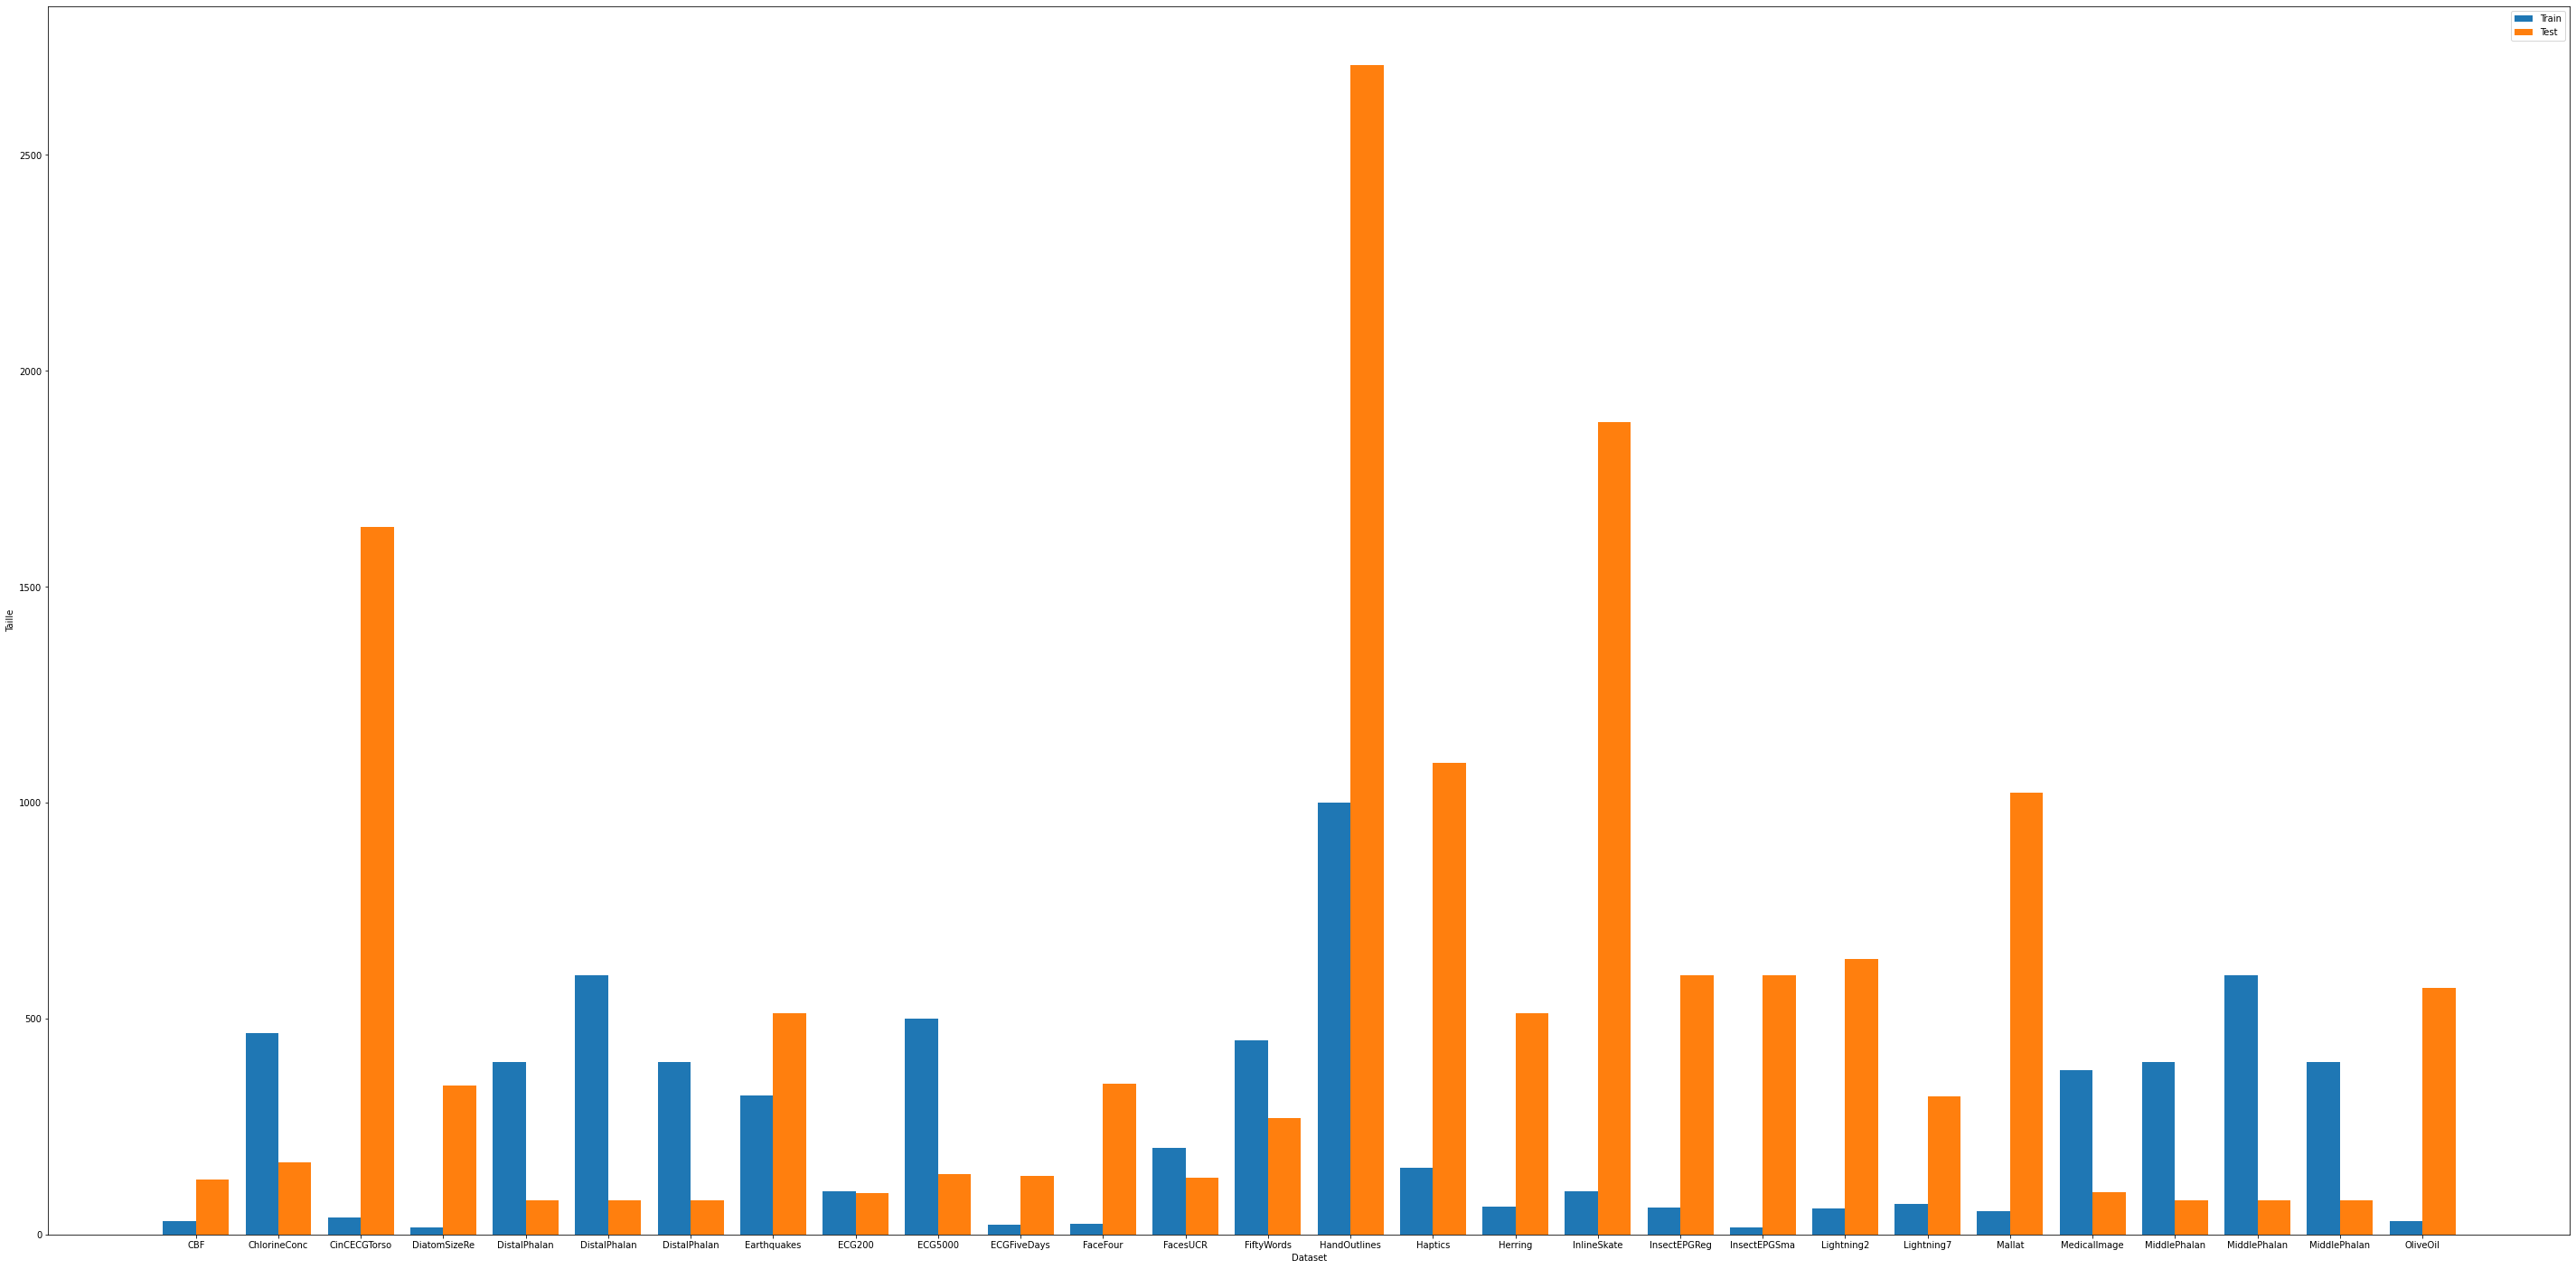

In [33]:
datasets = os.listdir('data')
datasets = [elt[:12] for elt in datasets]

plt.figure(figsize=(50,25))
X_axis = np.arange(len(datasets))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test')
plt.xticks(X_axis, datasets)
plt.xlabel("Dataset")
plt.ylabel("Taille")
plt.legend()

In [34]:
dataset = 'DiatomSizeReduction'


In [35]:
x_train,x_test,y_train,y_test = get_data(dataset, '\t')

y_train = class_offset(y_train, dataset)
y_test = class_offset(y_test, dataset)
y_train

array([1., 2., 3., 2., 2., 1., 3., 2., 3., 0., 1., 2., 1., 3., 1., 1.])

In [36]:


x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5)

print('train shape', x_train.shape)
print('validation shape', x_val.shape)
print('test shape', x_test.shape)



train shape (16, 345)
validation shape (153, 345)
test shape (153, 345)


In [37]:
def donut_visu(ax, data,name):
  recipe = [f'{round(data[i]/data.sum(),1)*100} % - Class {i}' for i in range(len(data))]


  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

  ax.set_title(name)


In [38]:
_, rat_train = np.unique(y_train, return_counts=True)
print(rat_train)
_, rat_val = np.unique(y_val, return_counts=True)
print(rat_val)
_, rat_test = np.unique(y_test, return_counts=True)
print(rat_test)

[1 6 5 4]
[15 48 46 44]
[18 44 48 43]


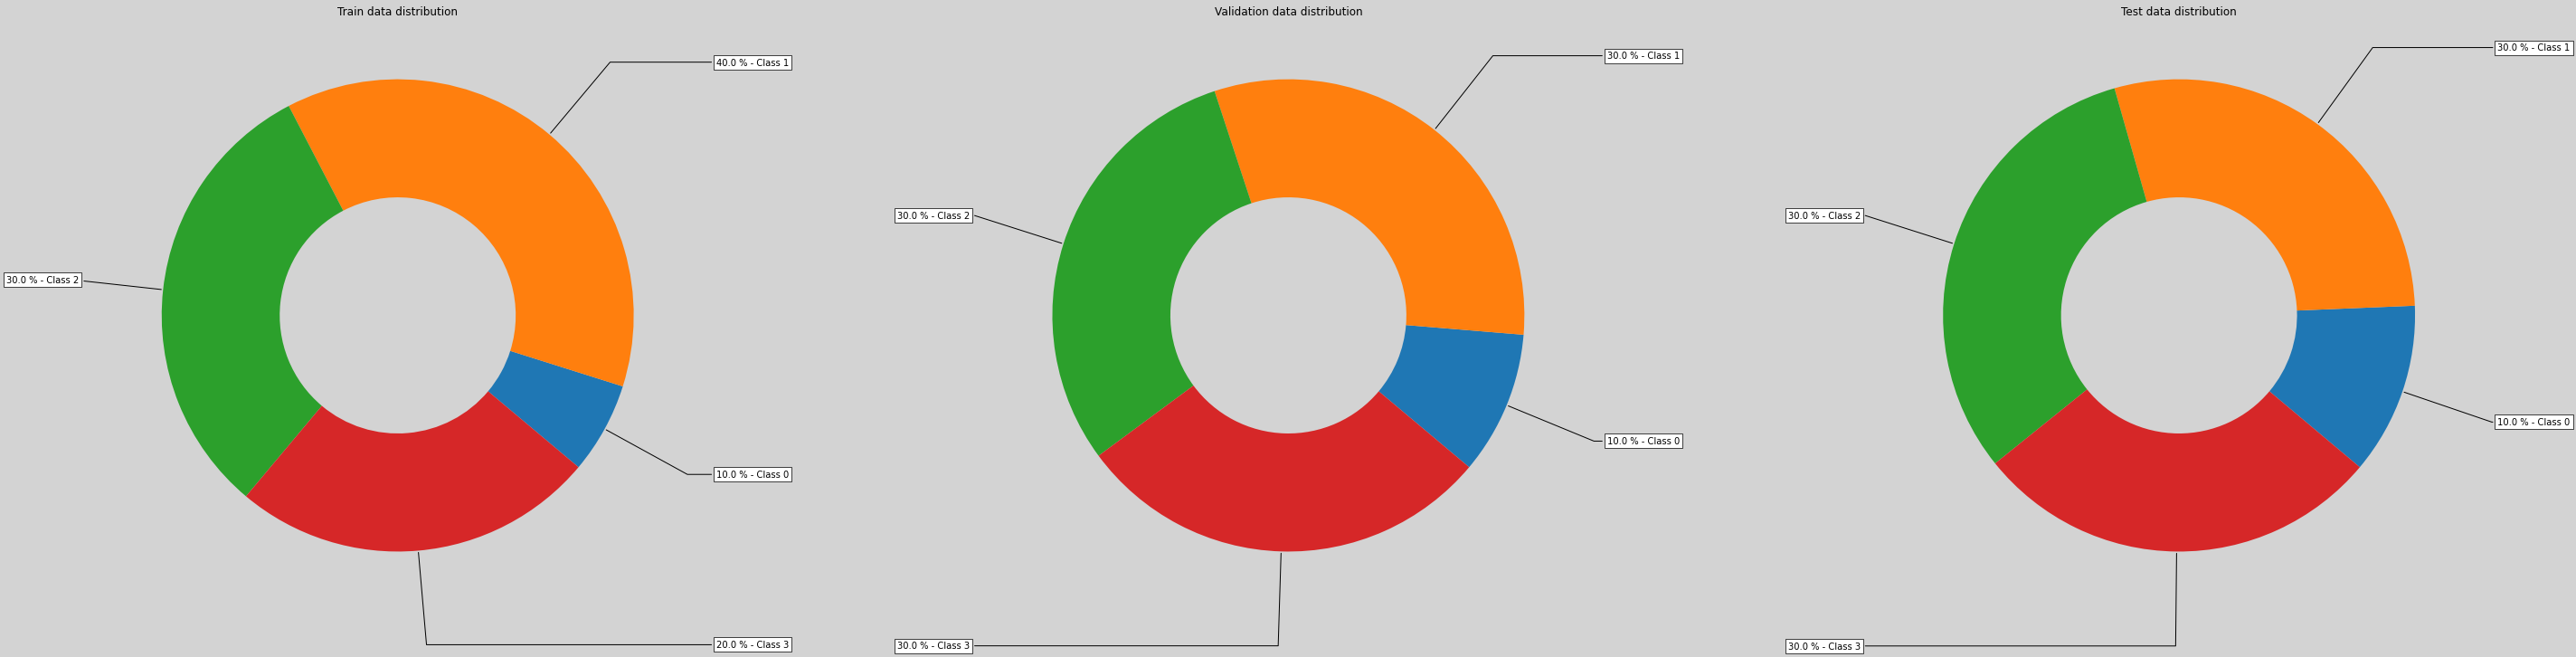

In [39]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(50, 12))

fig.set_facecolor('lightgrey')

donut_visu(ax0,rat_train,'Train data distribution')
donut_visu(ax1,rat_val,'Validation data distribution')
donut_visu(ax2,rat_test,'Test data distribution')

plt.show()

In [9]:
nb_class = nb_classes(dataset)
nb_dims = nb_dims(dataset)


nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps , nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
    #normalise in [-1;1]
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
x_val = 2. * (x_val - x_train_min) / (x_train_max - x_train_min) - 1.
x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.


#x_test = x_test.reshape((-1, input_shape[0], input_shape[1]))
#x_train = x_train.reshape((-1, input_shape[0], input_shape[1]))
##

: 

In [86]:
%ls Results

 Le volume dans le lecteur C s'appelle OS
 Le num�ro de s�rie du volume est 223F-EA4F

 R�pertoire de c:\Users\Joker\Desktop\ImbalancedTimeSeriesClassification\Results

11/10/2022  11:54    <DIR>          .
11/10/2022  11:54    <DIR>          ..
11/10/2022  11:54    <DIR>          Accuracy
11/10/2022  11:54    <DIR>          F1_scores
11/10/2022  11:54    <DIR>          G_scores
11/10/2022  11:54    <DIR>          Historic
11/10/2022  11:54    <DIR>          MCC
11/10/2022  11:54    <DIR>          Precision
               0 fichier(s)                0 octets
               8 R�p(s)  64�477�040�640 octets libres
